In [3]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from numba import jit


<font size = 5> Finite Difference Code for one-dimensional space</font>

<font size = 5> Null flux boundary conditions </font>

In [14]:
class Schnakenberg:
    def __init__(self,a,b,gamma,d,L,P,dt,T):
        self.a = a
        self.b = b
        self.gamma = gamma
        self.d = d
        self.L = L
        self.P = P
        self.dt = dt
        self.T = T

    def parameters(self):
        dx = self.L/self.P
        N = mt.floor(self.T/self.dt)
        u0 = self.a+self.b
        v0 = self.b/((self.a+self.b)**2)
        lambd = (self.dt)/(dx**2)
        x = np.arange(0,self.L+0.1,dx)
        t = np.arange(0,N,1)
        
        x = np.append(x,1)
        x = np.append(x,1)
        x = np.append(x,1)

        return self.a,self.b,self.gamma,self.d,self.L,self.P,self.dt,self.T,dx,N,u0,v0,lambd,x,t
        
    def mesh_creation(self):
        #Morphogen u
        mesh_u = np.zeros([len(x)])
        #Morphogen v
        mesh_v = np.zeros([len(x)])
        
        #Morphogen u
        mesh_u2 = np.zeros([len(x)])
        #Morphogen v
        mesh_v2 = np.zeros([len(x)])
        
        #Initial conditions building:
        x2 = random.rand(1,len(x))
        x3 = random.rand(1,len(x))

        mesh_u[:] = u0 + x2
        
        mesh_v[:] = v0 + x3
        
        mesh_u2[:] = u0 + x2
        
        mesh_v2[:] = v0 + x2

        return mesh_u,mesh_u2,mesh_v,mesh_v2
        
    @staticmethod
    @jit(nopython=True)
    def finite_difference(mesh_u, mesh_v, mesh_u2, mesh_v2, a, b, d, lambd, dx, N, x, gamma):
        for i in range(1,N):#time N (iterations i)
            
            #Null flux boundary conditions

            #U_mesh
        
            mesh_u[1] = mesh_u[2]
            mesh_u[len(x)-2] = mesh_u[len(x)-3]
        
            #V_mesh
        
            mesh_v[1] = mesh_v[2]
            mesh_v[len(x)-2] = mesh_v[len(x)-3]
    
            for j in range(2,len(x)-1): #j = columna eje x espacial en u
              mesh_u2[j] = mesh_u[j] + lambd*((dx**2)*gamma*(a - mesh_u[j] + ((mesh_u[j])**2 * mesh_v[j])) + mesh_u[j+1] -(2*mesh_u[j]) + mesh_u[j-1])
        
            for j in range(2,len(x)-1): #j = columna eje x espacial en v
              mesh_v2[j] = mesh_v[j] + d*lambd*((((dx**2)*gamma*(b - ((mesh_u[j])**2 * mesh_v[j])))/(d)) + mesh_v[j+1] -(2*mesh_v[j]) + mesh_v[j-1])

            mesh_u = mesh_u2
            mesh_v = mesh_v2
            
        return mesh_u, mesh_v

<font size = 5> Plotting </font>

In [22]:
def Plot(mesh_u,mesh_v,x,morphogen):
    x_ = np.arange(0, (len(x) - 1) + 0.1, 1)
    x = x_ / 96
    fig, ax = plt.subplots(figsize=(7, 4), ncols=1, nrows=1)
    fig.suptitle(f"Schnakenberg 1D, morphogen {morphogen}")
    current_ax = 0
    ax = fig.axes[current_ax]
    ax.plot(x, mesh_u, label = "Morphogen u")
    ax.plot(x, mesh_v, label = "Morphogen v")
    ax.legend()
    plt.show()

<font size = 5> Run class Schnakenberg </font>

In [15]:
#I choose the parameters a,b,d from the turing space and the time dt = 1e-5 from the stability condition for finite difference diffusion problems
schnakenberg_model = Schnakenberg(0.2,1.3, 220, 119, 1, 96, 0.4*10**(-6), 5)
a, b, gamma, d, L, P, dt, T, dx, N, u0, v0, lambd, x, t = schnakenberg_model.parameters()

# Create the meshes
mesh_u, mesh_u2, mesh_v, mesh_v2 = schnakenberg_model.mesh_creation()

#Run the finite difference
mesh_u, mesh_v = schnakenberg_model.finite_difference(mesh_u, mesh_v, mesh_u2, mesh_v2, a, b, d, lambd, dx, N, x, gamma)

#time ejecution 2 min

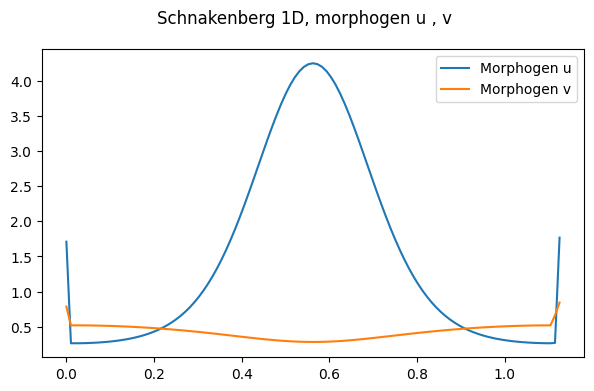

In [23]:
Plot(mesh_u,mesh_v,x,"u , v")